In [1]:

#<<<<<<<<<<<<<<<<<<<<#          Simulacion RS        #>>>>>>>>>>>>>>>>>>>># V 1.0


import random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pandas import Series, DataFrame
#pd.options.mode.chained_assignment = None 


TamañoDeLaMuestra = 500 # Cantidad de sujetos que quiero en la muestra.
QOpinionesExpuestas = 10 #Cantidad de opiniones que quiero que vea cada agente
QVecesMuestroOpinion = 10 # Cantidad de veces maxima que se muestra una opinion

In [2]:

# Defino a los agentes.

class Person (object):
    def __init__ (self, opinion,ID):
        self.Oi = opinion
        self.ID = ID # Genero un ID para cada agente
        self.IdeasVistas = [] # Me va a servir para almacenar las ideas a las que haya estado expuesto el sujeto
        self.IdeasVotadas = [] # Almaceno las ideas que voto

    
    def __str__ (self):
        try:
            devolver = 'despues defino que quiero que me devuelva'
            return devolver
        except:
            devolver = 'despues defino que quiero que me devuelva'
            return devolver
    
    def set_Oi (self, opinion):
        self.Oi = opinion
    
    def append_IdeasVistas (self, IdeaVista):
        self.IdeasVistas.append (IdeaVista)

    def append_IdeasVotadas (self, IdeaVotada):
        self.IdeasVotadas.append (IdeaVotada)           

    def votar (self, ideas): # Asume que se le da un dataframe con las opiniones (distribuidas uniformemente),
        Comp = 3             # y devuelve cual es el ID de la idea mas cercana a la del sujeto
        vota = 0
        for i in ideas.index:
            V = abs(ideas.at[i,'Opinion']-self.Oi)
            if V == Comp:
                vota = random.randint (i, vota)
            elif V < Comp:
                vota = i
                Comp = V
        return vota # Me devuelve la id de la idea a votar     
    
    def comparar (self, idea): # Devuelve la distancia entre la opinion que se le pase y la del sujeto
        Distancia = abs(idea-self.Oi)
        return Distancia
    
    def get_Oi (self):
        return self.Oi
    
    def get_IdeasVistas (self):
        return self.IdeasVistas

    def get_ID (self):
        return self.ID
    
    def clean_IdeasVistas (self):
        self.IdeasVistas = []
    
    


In [3]:

# Creo la muestra
Muestra_Completa = {}
for i in range (1,TamañoDeLaMuestra):
    Muestra_Completa [i] = Person (np.random.uniform (-1,1),i*111) # Creo una muestra de sujetos con una Opinion distribuida uniformemente, 
                                                                   # y les asigno una id a los sujetos


<ipython-input-4-1e7a4746d771>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OpinionesFiltradas.sort_values(by='Vistas', inplace=True) # Ordeno las ideas de menor a mayor acorde a la cantidad de vistas


     Sujeto Opinion Sujeto ID Idea Mostrada Idea Mostrada  \
0      1221       0.801417                0      0.554352   
1      1221       0.801417                1     -0.558764   
2      1221       0.801417                2      0.988097   
3      1221       0.801417                3      -0.36053   
4      1221       0.801417                4      0.501621   
...     ...            ...              ...           ...   
4885  55389       0.791429              493      0.342914   
4886  55389       0.791429              492     -0.332777   
4887  55389       0.791429              491     -0.118109   
4888  55389       0.791429              490     -0.282433   
4889  55389       0.791429              473     -0.782487   

                            Otras opiniones que vio   Voto Distancia  
0                       [1, 2, 3, 4, 5, 6, 7, 8, 9]  False  0.247065  
1                       [0, 2, 3, 4, 5, 6, 7, 8, 9]  False  1.360181  
2                       [0, 1, 3, 4, 5, 6, 7, 8, 9]  F

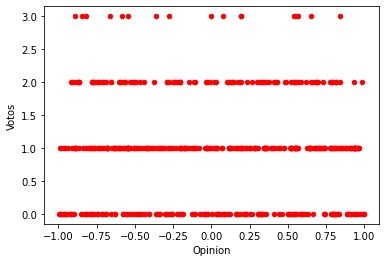

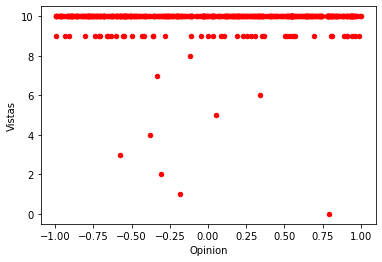

In [4]:

#¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Simulacion Basica ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

Muestra_Simulacion = Muestra_Completa.copy() # Creo una copia de la muestra original, por si se crean varias simulaciones diferentes
DataSave = pd.DataFrame(columns=['ID', 'Opinion', 'Votos', 'Vistas']) 
MinutoAMinuto = pd.DataFrame(columns=['Sujeto', 'Opinion Sujeto', 'ID Idea Mostrada', 'Idea Mostrada', 'Otras opiniones que vio', 'Voto', 'Distancia'])
OpinanNoVotan = 0
TiempoSimulacion = 0

for i in Muestra_Simulacion:
    ParticipanteActual = i
    if OpinanNoVotan < QOpinionesExpuestas: # Si hay menos opiniones que las necesarias para mostrar los individuos van a opinar, no votar.
        DataSave.at [OpinanNoVotan,'ID'] = Muestra_Simulacion.get(i).get_ID()
        DataSave.at [OpinanNoVotan,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
        DataSave.at [OpinanNoVotan,'Votos'] = 0
        DataSave.at [OpinanNoVotan,'Vistas'] = 0
        OpinanNoVotan +=1
    else:
        OpinionesFiltradas = DataSave[DataSave.Vistas < QVecesMuestroOpinion] # Filtro las ideas que tengan menos vistas del limite asignado
        OpinionesFiltradas.sort_values(by='Vistas', inplace=True) # Ordeno las ideas de menor a mayor acorde a la cantidad de vistas
        OpinionesParaVotar = OpinionesFiltradas.iloc[:QOpinionesExpuestas, :2] # Creo un dataframe con las ideas que va a ver el sujeto
        Muestra_Simulacion.get(i).append_IdeasVistas (OpinionesParaVotar)
        DataSave.at [i,'ID'] = Muestra_Simulacion.get(i).get_ID()
        DataSave.at [i,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
        DataSave.at [i,'Votos'] = 0
        DataSave.at [i,'Vistas'] = 0
        VotoActual = Muestra_Simulacion.get(i).votar(OpinionesParaVotar)
        DataSave.at [VotoActual,'Votos'] = DataSave.at [VotoActual,'Votos'] + 1 # Le sumo un voto a la idea.
        for i in OpinionesParaVotar.index:
            DataSave.at [i,'Vistas'] = DataSave.at [i,'Vistas'] + 1 # Le sumo una vista a la ideas expuestas
            
            # Armo un dataframe con el minuto a minuto de lo que fue pasando en la simulacion
            MinutoAMinuto.at [TiempoSimulacion,'Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_ID()
            MinutoAMinuto.at [TiempoSimulacion,'Opinion Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_Oi()
            MinutoAMinuto.at [TiempoSimulacion,'ID Idea Mostrada'] = i
            MinutoAMinuto.at [TiempoSimulacion,'Idea Mostrada'] = OpinionesParaVotar.at [i,'Opinion']
            CopiaOpiniones = OpinionesParaVotar.index.tolist()
            CopiaOpiniones.remove(i)
            MinutoAMinuto.at [TiempoSimulacion,'Otras opiniones que vio'] = CopiaOpiniones
            if (DataSave.at [VotoActual,'ID']) == (OpinionesParaVotar.at [i,'ID']):
                MinutoAMinuto.at [TiempoSimulacion,'Voto'] = True
            else:
                MinutoAMinuto.at [TiempoSimulacion,'Voto'] = False
            MinutoAMinuto.at [TiempoSimulacion,'Distancia'] = Muestra_Simulacion.get(ParticipanteActual).comparar(OpinionesParaVotar.at [i,'Opinion'])
            TiempoSimulacion +=1           

print (MinutoAMinuto)
print (DataSave.sort_values(by=['Votos'], ascending=False))

DataSave.plot(kind='scatter',x='Opinion',y='Votos',color='red')
DataSave.plot(kind='scatter',x='Opinion',y='Vistas',color='red')
#plt.yticks(range(5))
plt.show()

<ipython-input-5-619bb763bc4f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RestoDeOpiniones.sort_values(by='Ratio', ascending=False, inplace=True)
<ipython-input-5-619bb763bc4f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OpinionesFiltradas.sort_values(by=['Votos'], ascending=False, inplace=True) # Ordeno las ideas de mayor a menor acorde a la cantidad de votos


     Sujeto Opinion Sujeto ID Idea Mostrada Idea Mostrada  \
0      2331       0.101901                1     -0.558764   
1      2331       0.101901               18     -0.043121   
2      2331       0.101901               12      0.910935   
3      2331       0.101901                0      0.554352   
4      2331       0.101901               16     -0.804843   
...     ...            ...              ...           ...   
4785  55389       0.791429              466     -0.203667   
4786  55389       0.791429              477      0.569924   
4787  55389       0.791429              492     -0.332777   
4788  55389       0.791429              473     -0.782487   
4789  55389       0.791429              475     -0.435012   

                            Otras opiniones que vio   Voto Distancia  
0                   [18, 12, 0, 16, 10, 2, 4, 5, 3]  False  0.660665  
1                    [1, 12, 0, 16, 10, 2, 4, 5, 3]   True  0.145022  
2                    [1, 18, 0, 16, 10, 2, 4, 5, 3]  F

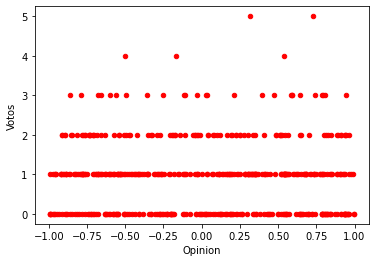

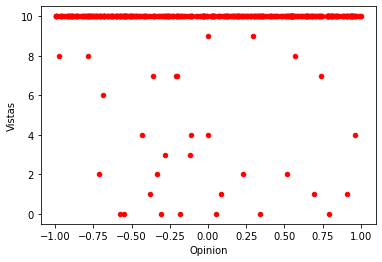

In [5]:

#¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Simulacion Votos/Vista ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

# Esta simulacion supone que se van a mostrar 5 (de las 10) ideas mas votadas, junto con 5 (de las 10) ideas con mayor ratio Votos/Vista

Muestra_Simulacion = Muestra_Completa.copy()
DataSave = pd.DataFrame(columns=['ID', 'Opinion', 'Votos', 'Vistas','Ratio'])
MinutoAMinuto = pd.DataFrame(columns=['Sujeto', 'Opinion Sujeto', 'ID Idea Mostrada', 'Idea Mostrada', 'Otras opiniones que vio', 'Voto', 'Distancia'])
OpinanNoVotan = 0
TiempoSimulacion = 0

for i in Muestra_Simulacion:
    ParticipanteActual = i
    if OpinanNoVotan < 20: # Si hay menos opiniones que las necesarias para mostrar los individuos van a opinar, no votar.
        DataSave.at [OpinanNoVotan,'ID'] = Muestra_Simulacion.get(i).get_ID()
        DataSave.at [OpinanNoVotan,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
        DataSave.at [OpinanNoVotan,'Votos'] = 0
        DataSave.at [OpinanNoVotan,'Vistas'] = 0
        DataSave.at [OpinanNoVotan,'Ratio'] = 0
        OpinanNoVotan +=1
    else:
        OpinionesFiltradas = DataSave[DataSave.Vistas < QVecesMuestroOpinion] # Filtro las ideas que tengan menos vistas del limite asignado
        OpinionesFiltradas.sort_values(by=['Votos'], ascending=False, inplace=True) # Ordeno las ideas de mayor a menor acorde a la cantidad de votos
        OpinionesMasVotadas = OpinionesFiltradas.iloc[:10, :2] # Creo un DF con las 10 Opiniones mas votadas
        OpinionesMasVotadasSeleccionadas = OpinionesMasVotadas.sample (n=5) # Selecciono 5 de las 10 opiniones mas votadas
        RestoDeOpiniones = OpinionesFiltradas.iloc[10:, :]
        RestoDeOpiniones.sort_values(by='Ratio', ascending=False, inplace=True)
        OpinionesConMayorRatio = RestoDeOpiniones.iloc[:10, :2]  # Creo un df con las 10 opiniones con mayor ratio
        OpinionesConMayorRatioSeleccionadas = OpinionesConMayorRatio.sample (n=5)  # Selecciono 5 de las 10 opiniones con mayor ratio
        OpinionesParaVotar = pd.concat([OpinionesMasVotadasSeleccionadas, OpinionesConMayorRatioSeleccionadas])
        Muestra_Simulacion.get(i).append_IdeasVistas (OpinionesParaVotar)
        DataSave.at [i,'ID'] = Muestra_Simulacion.get(i).get_ID()
        DataSave.at [i,'Opinion'] = Muestra_Simulacion.get(i).get_Oi()
        DataSave.at [i,'Votos'] = 0
        DataSave.at [i,'Vistas'] = 0
        DataSave.at [i,'Ratio'] = 0
        VotoActual = Muestra_Simulacion.get(i).votar(OpinionesParaVotar)
        DataSave.at [VotoActual,'Votos'] = DataSave.at [VotoActual,'Votos'] + 1 # Le sumo un voto a la idea.
        for i in OpinionesParaVotar.index:
            DataSave.at [i,'Vistas'] = DataSave.at [i,'Vistas'] + 1 # Le sumo una vista a la ideas expuestas
            DataSave.at [i,'Ratio'] = DataSave.at [i,'Votos'] / DataSave.at [i,'Vistas']
            
            # Armo un dataframe con el minuto a minuto de lo que fue pasando en la simulacion
            MinutoAMinuto.at [TiempoSimulacion,'Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_ID()
            MinutoAMinuto.at [TiempoSimulacion,'Opinion Sujeto'] = Muestra_Simulacion.get(ParticipanteActual).get_Oi()
            MinutoAMinuto.at [TiempoSimulacion,'ID Idea Mostrada'] = i
            MinutoAMinuto.at [TiempoSimulacion,'Idea Mostrada'] = OpinionesParaVotar.at [i,'Opinion']
            CopiaOpiniones = OpinionesParaVotar.index.tolist()
            CopiaOpiniones.remove(i)
            MinutoAMinuto.at [TiempoSimulacion,'Otras opiniones que vio'] = CopiaOpiniones
            if (DataSave.at [VotoActual,'ID']) == (OpinionesParaVotar.at [i,'ID']):
                MinutoAMinuto.at [TiempoSimulacion,'Voto'] = True
            else:
                MinutoAMinuto.at [TiempoSimulacion,'Voto'] = False
            MinutoAMinuto.at [TiempoSimulacion,'Distancia'] = Muestra_Simulacion.get(ParticipanteActual).comparar(OpinionesParaVotar.at [i,'Opinion'])
            TiempoSimulacion +=1           

print (MinutoAMinuto)
print (DataSave.sort_values(by=['Votos'], ascending=False))

DataSave.plot(kind='scatter',x='Opinion',y='Votos',color='red')
DataSave.plot(kind='scatter',x='Opinion',y='Vistas',color='red')
#plt.yticks(range(5))
plt.show()